<a href="https://colab.research.google.com/github/JapiKredi/EDA_extensive_library/blob/main/Assignment_nyc_taxi_trip_duration_JasperBongers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import datetime
from time import strftime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
data = pd.read_csv('/content/drive/My Drive/Assignment_nyc_taxi_trip_duration_JasperBongers/nyc_taxi_trip_duration.csv')

In [4]:
# Head of the data
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694931                  N           1100  
2         40.774918                  N           1635  
3         40.780628                  N           1141  
4         40.740631                  N            848

In [7]:
# Tail of the data
data.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
729317         40.789181                  N            296  
729318         40.731911                  N            315  
729319         40.741207                  N            673  
729320         40.713814                  N            447  
729321         40.712841                  N           1224

In [8]:
# Analysis of the shape f the dataframe
data.shape
# The dataset consists of 729322 rows and 11 columns
# 729322 taxi trips and 11 features

(729322, 11)

In [9]:
# Analysis of the datatypes of the columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
# Geeting the info function:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [11]:
# Check for missing values
data.isnull().sum()
# Conclusion: no missing values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
# Lets see the dataset description (for all numerical columns)
data.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  729322.000000    729322.000000     729322.000000    729322.000000   
mean        1.535403         1.662055        -73.973513        40.750919   
std         0.498745         1.312446          0.069754         0.033594   
min         1.000000         0.000000       -121.933342        34.712234   
25%         1.000000         1.000000        -73.991859        40.737335   
50%         2.000000         1.000000        -73.981758        40.754070   
75%         2.000000         2.000000        -73.967361        40.768314   
max         2.000000         9.000000        -65.897385        51.881084   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      729322.000000     729322.000000   7.293220e+05  
mean          -73.973422         40.751775   9.522291e+02  
std             0.069588          0.036037   3.864626e+03  
min          -121.933304         32.181141   1.000000e+00  
25%           -73.991318         40.735931   3.970000e+02  
50%           -73.979759         40.754509   6.630000e+02  
75%           -73.963036         40.769741   1.075000e+03  
max           -65.897385         43.921028   1.939736e+06

In [13]:
## cheaking if any duplicate values
data.duplicated().sum()
## no duplicated values

0

# Encoding

let's analyze each column in the provided data and suggest appropriate encoding techniques based on the nature of the data:

1. **id**: a unique identifier for each trip.

2. **Vendor_id**: a code indicating the provider associated with the trip record.

3. **Pickup_datetime**: date and time when the meter was engaged.

4. **Dropoff_datetime**: date and time when the meter was disengaged.

5. **Passenger_count**: the number of passengers in the vehicle (driver entered value).

6. **Pickup_longitude**: the longitude where the meter was engaged.

7. **pickup_latitude**: the latitude where the meter was engaged.

8. **Dropoff_longitude**: the longitude where the meter was disengaged.

9. **Dropoff_latitude**: the latitude where the meter was disengaged.

10. **Store_and_fwd _flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).

11. **trip_duration**: (target) duration of the trip in seconds.


# Integer Data Type


In [14]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

**vendor_id** -> it is okay for this to be an int64.

**passenger_count** -> very good for this to be an int64.

**trip_duration** -> number of seconds can be best translated into a datetime object. If we want to understand the duration of events in a more human-readable format (e.g., hours, minutes, seconds), converting the seconds into a timedelta object can be helpful.


In [15]:
# Assuming 'data' is your DataFrame and 'event_duration' is the column with the number of seconds
data['trip_duration'] = pd.to_timedelta(data['trip_duration'], unit='s')

In [16]:
# Verify if the trip_duration feature was changed into a Datetime object
data.info()
# Conclusion: Yes! properly converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  object         
 3   dropoff_datetime    729322 non-null  object         
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 61.2+ MB


# Float Data Type

In [17]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

Longitude and latitude values require precision, which is well-supported by the float64 data type.

So no need to convert these.

# Object Data Type

In [18]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

**pickup_datetime** -> good to convert into a datetime object.

**dropoff_datetime** -> good to convert into a datetime object.

**store_and_fwd_flag** -> good to convert this into 0's and 1's.



In [19]:
# Convert pickup_datetime and dropoff_datetime into a Datetime object
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [20]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  datetime64[ns] 
 3   dropoff_datetime    729322 non-null  datetime64[ns] 
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 61.2+ MB


In [21]:
# Use pd.get_dummies to convert 'store_and_fwd_flag' into numerical values
data = pd.get_dummies(data, columns=['store_and_fwd_flag'])

In [22]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  bool           
 11  store_and_fwd_flag_Y  729322 non-null  bool           
dtypes: bool(2), datetime64[ns](2), float64(4), i

In [23]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_N'] = data['store_and_fwd_flag_N'].astype('int64')

In [24]:
# Checking the unique values of store_and_fwd_flag_N
print(data['store_and_fwd_flag_N'].unique())

[1 0]


In [25]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_Y'] = data['store_and_fwd_flag_Y'].astype('int64')

In [26]:
# Checking if the datatype was converted properly
data.info()
# Successfully converted to int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  int64          
 11  store_and_fwd_flag_Y  729322 non-null  int64          
dtypes: datetime64[ns](2), float64(4), int64(4), 

In [27]:
# Checking the unique values of store_and_fwd_flag_Y
print(data['store_and_fwd_flag_Y'].unique())

[0 1]


### Datetimeobject

We can craate new Datetime objects by some simple calculations on Datetime objects


In [28]:
# Create a new variable real_trip_duration by taking the difference between pickup_datetime and dropoff_datetime
data['real_trip_duration'] = data['dropoff_datetime'] - data['pickup_datetime']

In [29]:
# Get the head function for dataframe data
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude   trip_duration  store_and_fwd_flag_N  \
0         40.771164 0 days 00:06:40                     1   
1         40.694931 0 days 00:18:20                     1   
2         40.774918 0 days 00:27:15                     1   
3         40.780628 0 days 00:19:01                     1   
4         40.740631 0 days 00:14:08                     1   

   store_and_fwd_flag_Y real_trip_duration  
0                     0    0 days 00:06:40  
1                     0    0 days 00:18:20  
2                     0    0 days 00:27:15  
3                     0    0 days 00:19:01  
4                     0    0 days 00:14:08

In [30]:
# Comparing (target) trip_duration with real_trip_duration
data[['trip_duration', 'real_trip_duration']].sum()
# The (target) trip_duration with real_trip_duration are excately the same

trip_duration        8037 days 23:34:16
real_trip_duration   8037 days 23:34:16
dtype: timedelta64[ns]

In [31]:
# Check if the columns are exactly the same
are_equal = data['trip_duration'].equals(data['real_trip_duration'])
print(f"The columns are exactly the same: {are_equal}")
# The (target) trip_duration with real_trip_duration are excately the same

The columns are exactly the same: True


In [32]:
# As real_trip_duration is excately the sale as trip_duration
# remove the column real_trip_duration from the dataset as it does not contain any new information.
data.drop('real_trip_duration', axis=1, inplace=True)

In [33]:
# Change trip_duration from a Datatime datatype to int64 in order to make the processing faster and consume less memory
data['trip_duration'] = data['trip_duration'].astype('int64')

In [34]:
# Check if both changes have been implemented properly
data.info()
# Conclusion: Yes!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memo

# Univariate analysis

## Distribution

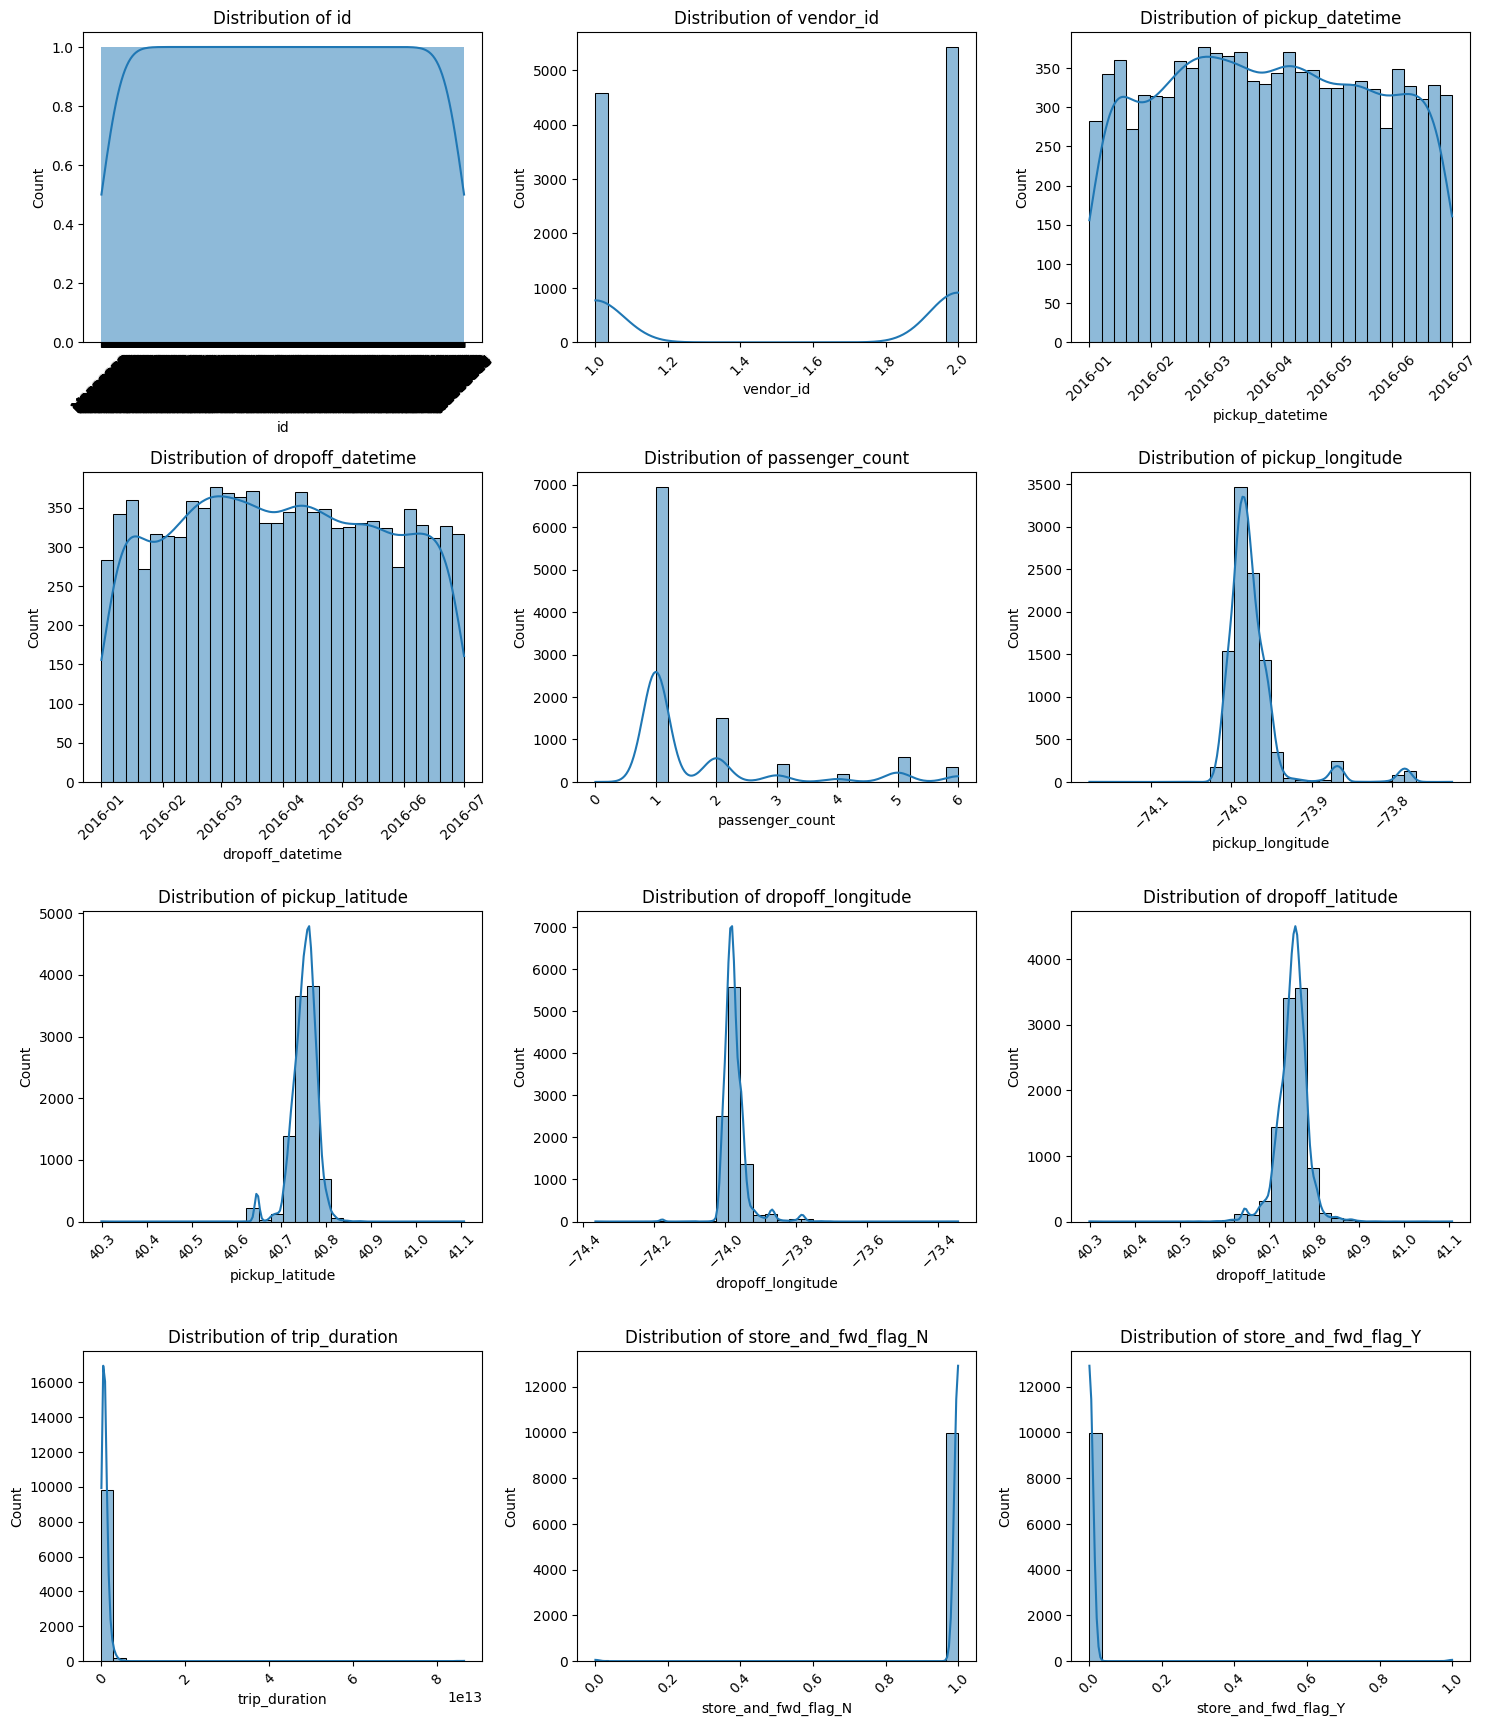

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset

data_subset = data.iloc[:10000]  # Take the first 10,000 rows

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i + 1)
    # Limit the number of bins to avoid excessive memory usage
    try:
        plt.title(f'Distribution of {column}')
        sns.histplot(data_subset[column], kde=True, bins=30)
        plt.xticks(rotation=45)
    except MemoryError:
        print(f"MemoryError: Skipping column {column} due to memory constraints")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

In [36]:
# Select only the numercial data
numerical_data = data.select_dtypes(include=['int64', 'float64'])
# Remove id , vendor_id, store_and_fwd_flag_N, store_and_fwd_flag_Y, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
numerical_data = numerical_data.drop(['vendor_id', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

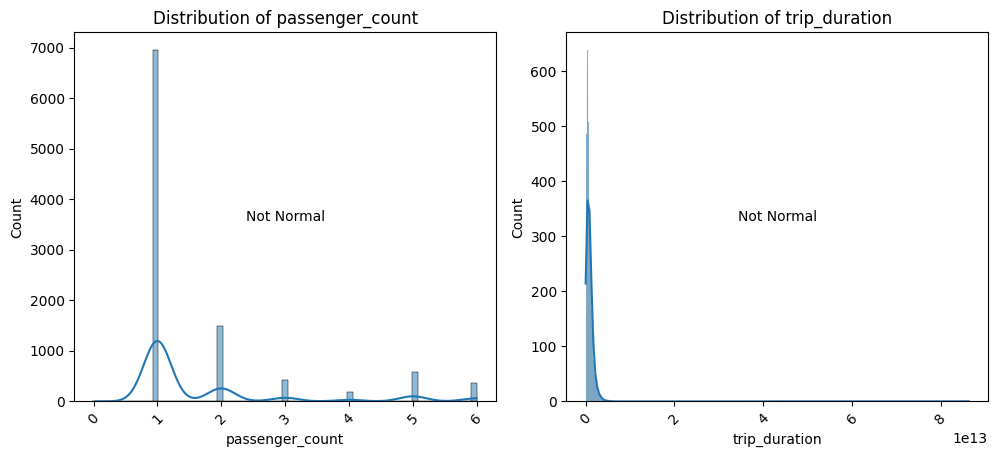

In [37]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

from scipy import stats

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(data_subset[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


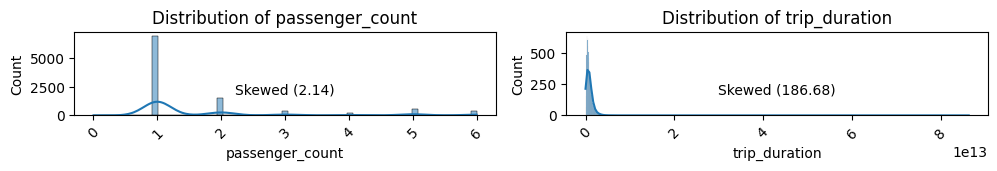

In [38]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

# Taking a subset to minimize impact on memory
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Outliers


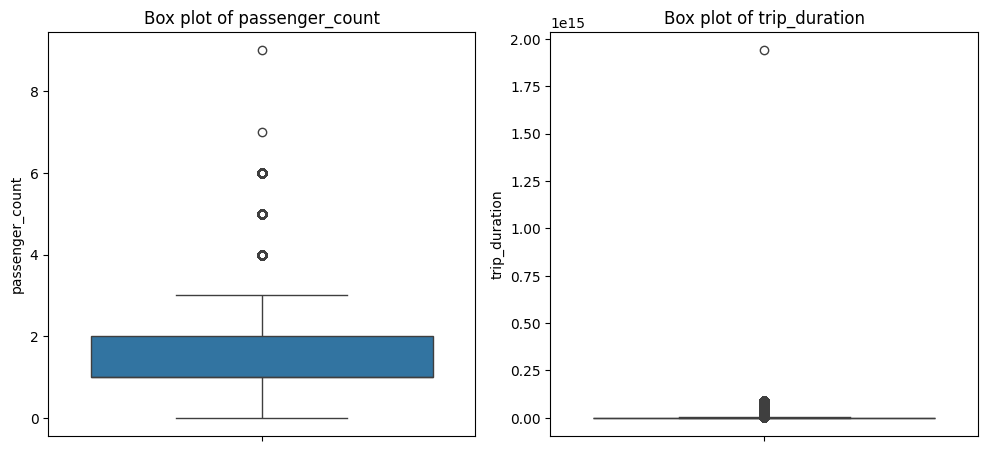

In [39]:
# For the outlier analysis we cannot take a subset.

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(numerical_data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Bivariate analysis

In [40]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 passenger_count  trip_duration
passenger_count         1.000000       0.013022
trip_duration           0.013022       1.000000


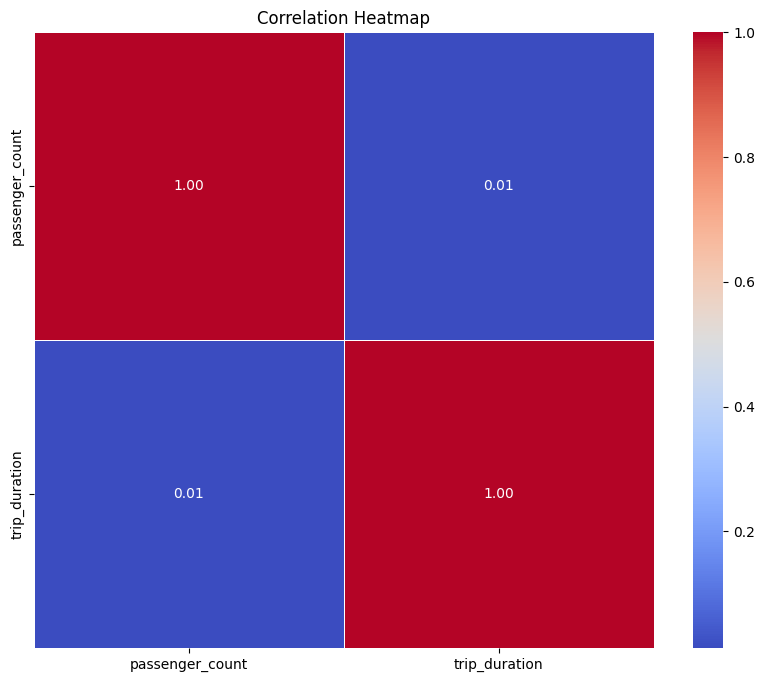

In [41]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Using a package ydata_profiling do do an automatic EDA of ur dataset and see what is possible (for educational purposes)

In [42]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=29030e3e619e5133eb8a4630f50093329d948e3dfc30623d3ed2f48a451348ef
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [43]:
# Import the ProfileReport class from the ydata_profiling module
from ydata_profiling import ProfileReport

In [44]:
# Generate the profile report
report = ProfileReport(data)

# Save the report to a file
report.to_file("/content/drive/My Drive/data_profile_report.html")

# Alternatively, you can also display the report directly
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  trip_duration  store_and_fwd_flag_N  store_and_fwd_flag_Y  
0         40.771164   400000000000                     1                     0  
1         40.694931  1100000000000                     1                     0  
2         40.774918  1635000000000                     1                     0  
3         40.780628  1141000000000                     1                     0  
4         40.740631   848000000000                     1                     0

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memo

#Data Preprocessing

### PLanning:
1) Remove redudant columns

2) Creating new derrived features

3) Removing outliers

4) Scaling the data




# 1) Removing redundant features

In [ ]:
data = data.drop(['id','vendor_id', ],axis = 1)

#2) Creating new derrived features

### 1) Creating a new distance feature by comparing the longitude and latitude features.
### 2) Creating new features of the datetime to capture the moment of thye week and to moment in the day


## 1) Creating a new distance feature

In [47]:
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  trip_duration  store_and_fwd_flag_N  store_and_fwd_flag_Y  
0         40.771164   400000000000                     1                     0  
1         40.694931  1100000000000                     1                     0  
2         40.774918  1635000000000                     1                     0  
3         40.780628  1141000000000                     1                     0  
4         40.740631   848000000000                     1                     0

In [48]:
# Use the formula of pytharas to calculate the distance travelled via SquareRooth((dropoff_longitude-pickup_longitude)^2 + (dropoff_latitude-pickup_latitude)^2)
data['distance'] = np.sqrt((data['dropoff_longitude'] - data['pickup_longitude'])**2 + (data['dropoff_latitude'] - data['pickup_latitude'])**2)

In [49]:
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  trip_duration  store_and_fwd_flag_N  \
0         40.771164   400000000000                     1   
1         40.694931  1100000000000                     1   
2         40.774918  1635000000000                     1   
3         40.780628  1141000000000                     1   
4         40.740631   848000000000                     1   

   store_and_fwd_flag_Y  distance  
0                     0  0.012592  
1                     0  0.037371  
2                     0  0.072712  
3                     0  0.021473  
4                     0  0.043264

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
 12  distance              729322 non-null  float64       
dtyp

## 2) Creating new features of the datetime to capture the moment of thye week and to moment in the day


'pickup_datetime','dropoff_datetime'

In [53]:
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  trip_duration  store_and_fwd_flag_N  \
0         40.771164   400000000000                     1   
1         40.694931  1100000000000                     1   
2         40.774918  1635000000000                     1   
3         40.780628  1141000000000                     1   
4         40.740631   848000000000                     1   

   store_and_fwd_flag_Y  distance  
0                     0  0.012592  
1                     0  0.037371  
2                     0  0.072712  
3                     0  0.021473  
4                     0  0.043264

In [54]:
# Creating new features out of the pickup_datetime, like day of the week, day in the month, time at the day
data['pickup_day_of_week'] = data['pickup_datetime'].dt.day_name()
data['pickup_day_of_month'] = data['pickup_datetime'].dt.day
data['pickup_time'] = data['pickup_datetime'].dt.time

In [55]:
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  trip_duration  store_and_fwd_flag_N  \
0         40.771164   400000000000                     1   
1         40.694931  1100000000000                     1   
2         40.774918  1635000000000                     1   
3         40.780628  1141000000000                     1   
4         40.740631   848000000000                     1   

   store_and_fwd_flag_Y  distance pickup_day_of_week  pickup_day_of_month  \
0                     0  0.012592             Monday                   29   
1                     0  0.037371             Friday                   11   
2                     0  0.072712             Sunday                   21   
3                     0  0.021473            Tuesday                    5   
4                     0  0.043264          Wednesday                   17   

  pickup_time  
0    16:40:21  
1    23:35:37  
2    17:59:33  
3    09:44:31  
4    06:42:23

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
 12  distance              729322 non-null  float64       
 13 

#Removing Outliers

In [52]:
data.describe()

vendor_id                pickup_datetime  \
count  729322.000000                         729322   
mean        1.535403  2016-04-01 11:17:42.123299584   
min         1.000000            2016-01-01 00:01:14   
25%         1.000000  2016-02-17 18:46:36.249999872   
50%         2.000000     2016-04-01 17:30:37.500000   
75%         2.000000  2016-05-15 07:13:01.249999872   
max         2.000000            2016-06-30 23:59:37   
std         0.498745                            NaN   

                    dropoff_datetime  passenger_count  pickup_longitude  \
count                         729322    729322.000000     729322.000000   
mean   2016-04-01 11:33:34.352432128         1.662055        -73.973513   
min              2016-01-01 00:05:54         0.000000       -121.933342   
25%       2016-02-17 19:00:30.500000         1.000000        -73.991859   
50%       2016-04-01 17:46:47.500000         1.000000        -73.981758   
75%       2016-05-15 07:38:40.500000         2.000000        -73.967361   
max              2016-07-01 23:02:03         9.000000        -65.897385   
std                              NaN         1.312446          0.069754   

       pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
count    729322.000000      729322.000000     729322.000000   7.293220e+05   
mean         40.750919         -73.973422         40.751775   9.522291e+11   
min          34.712234        -121.933304         32.181141   1.000000e+09   
25%          40.737335         -73.991318         40.735931   3.970000e+11   
50%          40.754070         -73.979759         40.754509   6.630000e+11   
75%          40.768314         -73.963036         40.769741   1.075000e+12   
max          51.881084         -65.897385         43.921028   1.939736e+15   
std           0.033594           0.069588          0.036037   3.864626e+12   

       store_and_fwd_flag_N  store_and_fwd_flag_Y       distance  
count         729322.000000         729322.000000  729322.000000  
mean               0.994461              0.005539       0.035481  
min                0.000000              0.000000       0.000000  
25%                1.000000              0.000000       0.012597  
50%                1.000000              0.000000       0.021235  
75%                1.000000              0.000000       0.038424  
max                1.000000              1.000000      11.192603  
std                0.074221              0.074221       0.046238

# Conclusions w.r.t. Outliers

We see potential outliers at the following features...

1) trip_duration -> 1.939736e+15 seconds is a lot

2) distance -> there are some very high numbers


#### Handling outliers @ trip_duration

In [69]:
data.trip_duration.describe()

count    7.293220e+05
mean     9.522291e+11
std      3.864626e+12
min      1.000000e+09
25%      3.970000e+11
50%      6.630000e+11
75%      1.075000e+12
max      1.939736e+15
Name: trip_duration, dtype: float64

In [57]:
data['trip_duration'].quantile(0.25), data['distance'].quantile(0.75)

(397000000000.0, 0.03842359454313694)

In [58]:
IQR = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
IQR

678000000000.0

In [59]:
Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-620000000000.0, 2092000000000.0)

#### Handling outliers @ distance

In [68]:
data.distance.describe()

count    729322.000000
mean          0.035481
std           0.046238
min           0.000000
25%           0.012597
50%           0.021235
75%           0.038424
max          11.192603
Name: distance, dtype: float64

In [60]:
data['distance'].quantile(0.25), data['distance'].quantile(0.75)

(0.01259734449999049, 0.03842359454313694)

In [61]:
IQR = data['distance'].quantile(0.75) - data['distance'].quantile(0.25)
IQR

0.025826250043146447

In [62]:
Q1 = data['distance'].quantile(0.25)
Q3 = data['distance'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-0.026142030564729177, 0.0771629696078566)

In [ ]:
df_df_og = df.copy()
# Drop the columns specified in the num_cols list from the DataFrame df.
# The axis=1 parameter indicates that columns are being dropped (as opposed to rows).
df = df.drop(columns = num_cols,axis = 1)
# Merging the Standardized Columns Back into the DataFrame
# The how="left" parameter specifies a left join,
# meaning all rows from the original DataFrame df will be retained,
# and the corresponding rows from the scaled DataFrame will be added.
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

# Isolating the dependent (output/target) variable

In [ ]:
y_all = df.churn
df = df.drop(['churn','customer_id','occupation'],axis = 1)

## Model Building and Evaluation Metrics
Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall
2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

### Baseline Columns

In [ ]:
df.head()

In [ ]:
y_all.head()

In [ ]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [ ]:
df_baseline = df[baseline_cols]

### Train Test Split to create a validation set

In [ ]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [ ]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

### AUC ROC Curve & Confusion Matrix

Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion Matrix
pred_val = model.predict(xtest)

In [ ]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [ ]:
# Recall Score
recall_score(ytest,pred_val)